In [2]:
import numpy as np
data = np.array([[5, 12, 1],
                [6, 21, 0],
                [14, 5, 0],
                [16, 10, 0],
                [13, 19, 0],
                [13, 32, 1],
                [17, 27, 1],
                [18, 24, 1],
                [20, 20, 0],
                [23, 14, 1],
                [23, 25, 1],
                [23, 31, 1],
                [26, 8, 0],
                [30, 17, 1],
                [30, 26, 1],
                [34, 8, 0],
                [34, 19, 1],
                [37, 28, 1]])
X_train = data[:,:2]
Y = data[:,-1]

In [94]:
class KNN:
    def __init__(self,k=3,p=2):
        self.k = k
        self.p = p
    def fit(self,X_train,Y):
        self.X_train = X_train
        self.Y = Y
        return
    @staticmethod
    def get_lp_distance(x1,x2,p):
        # return np.power(np.sum(np.power(np.abs(x1-x2),p)),1/p)
        return np.linalg.norm(x1-x2,p)
        
    def predict(self,x):
        topk_list = []#list of [distance,label]
        max_neighbor_idx = None
        # find neighbor         
        for x_,y_ in zip(self.X_train,self.Y):
            distance = self.get_lp_distance(x,x_,self.p)
            # add to topk_list
            if len(topk_list)<self.k:
                topk_list.append([distance,y_])
                # 计算最远邻居
                max_neighbor_idx = 0 if max_neighbor_idx is None else max_neighbor_idx
                max_neighbor_idx = max_neighbor_idx if topk_list[max_neighbor_idx][0]>distance else len(topk_list)-1
            elif topk_list[max_neighbor_idx][0]>distance:
                topk_list[max_neighbor_idx] = [distance,y_]
                # 计算最远邻居
                max_neighbor_idx = topk_list.index(max(topk_list,key = lambda x:x[0]))
            else:
                continue
        # vote
        from collections import Counter
        vote = Counter([i[1] for i in topk_list])
        vote_sorted = sorted(vote.items(),key=lambda x:x[1],reverse=True)
        # 处理平票的情况
        # max_vote_count = vote_sorted[0][1]
        # candidate_labels = []
        # for label,vote_count in vote_sorted:
        #     if vote_count == max_vote_count:
        #         candidate_labels.append(label)
        #     else:
        #         break
        # if len(candidate_labels)==1:
        #     return candidate_labels[0]
        # else:
        #     sum_distance_list = []
        #     for candi_label in candidate_labels:
        #         sum_distance_list += [sum([i[0] for i in topk_list if i[1]==candi_label])]
        #     return sorted(zip(candidate_labels,sum_distance_list),key = lambda x:x[1])[0][0]
        #
        return vote_sorted[0][0]

In [95]:
model_1 = KNN(k=1)
model_1.fit(X_train,Y)
# 
model_2 = KNN(k=2)
model_2.fit(X_train,Y)

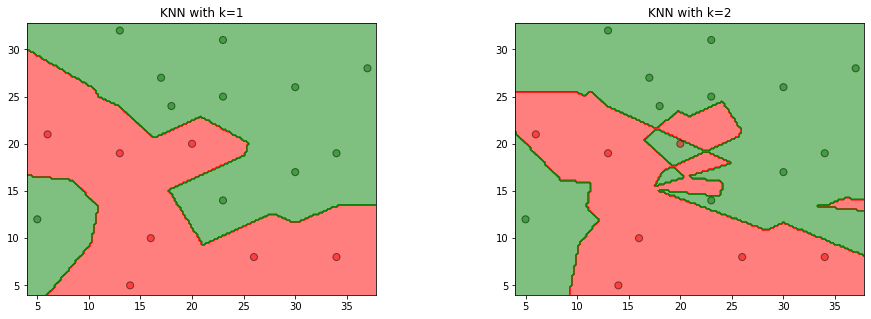

In [104]:
from matplotlib.colors import ListedColormap 
# 构建meshgrid
X0, X1 = X_train[:, 0], X_train[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))
# 
fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# 
models = [model_1,model_2]
titles = ['KNN with k=%d'%i for i in [1,2]]
figs = fig.subplots(1, 2).flatten()
colors = ['red', 'green', 'lightgreen', 'gray', 'cyan']
for clf, title, ax in zip(models, titles, figs):    
    Z = np.array([clf.predict(x_) for x_ in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    # 绘制划分空间     
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)#contourf填充轮廓
    # 绘制实例点     
    ax.scatter(X0, X1, c=Y, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)
plt.show()